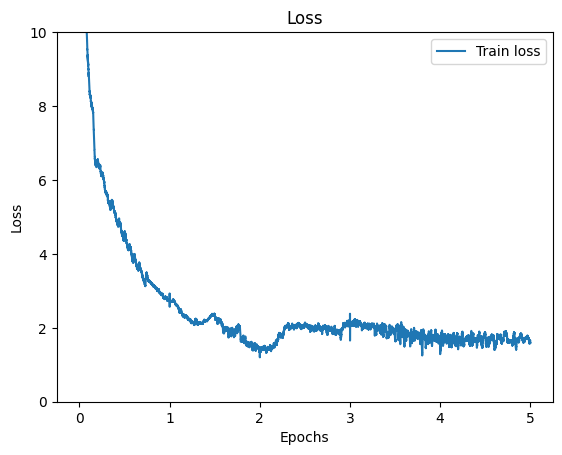

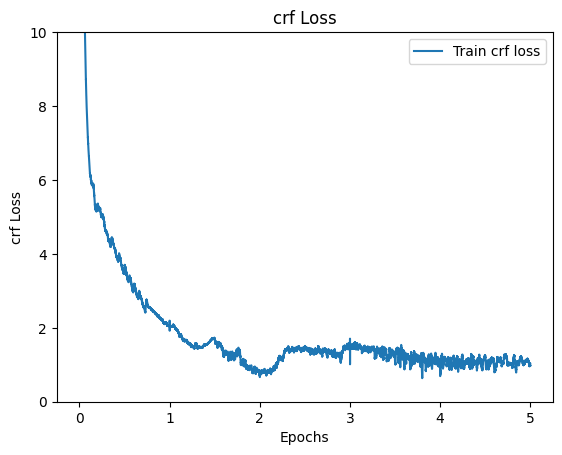

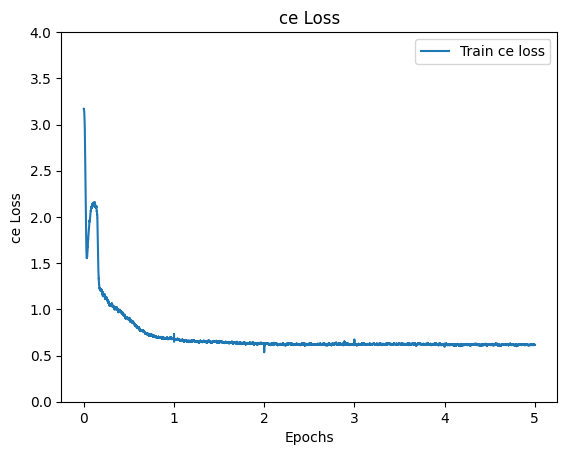

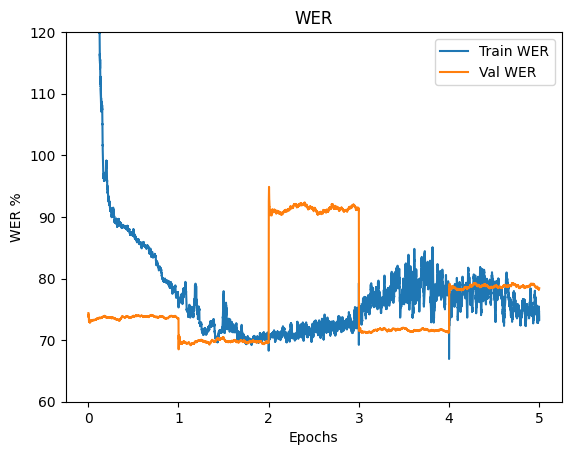

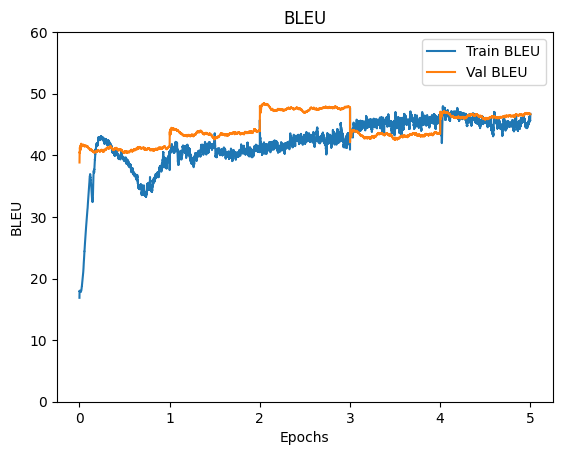

In [50]:
import matplotlib.pyplot as plt
import numpy as np

data1 = '20260101_033912'

with open('./model/MyOriginal_train_loss_' + data1 + '.csv',encoding='utf-8')as f:
    line1_all = f.readlines()

with open('./model/MyOriginal_val_loss_' + data1 + '.csv',encoding='utf-8')as f:
    line2_all = f.readlines()


i = 0
x = []
loss = []
ctc = []
kd = []
error = []
bleu = []
v_i = 0
v_x = []
v_loss = []
v_ctc = []
v_kd = []
v_error = []
v_bleu = []

#line2 = line2_all[0].replace( "\n", "")
#len_tr_loader = int(line2)

for i, line1 in enumerate( line1_all ):
    if i == 0:
        line1 = line1.replace( "\n", "")
        len_tr_loader = int(line1)
    else:
        line1_split = line1.split(",")
        i += 1
        x.append( i / len_tr_loader )
        loss.append( float(line1_split[1].split(' ')[1]) )
        ctc.append( float(line1_split[2].split(' ')[1]) )
        kd.append( float(line1_split[3].split(' ')[1]) )
        error.append( float(line1_split[4].split(' ')[1]) )
        bleu.append( float(line1_split[5].split( ' ' )[1]))

#print( "pad:", pad )

for i, line2 in enumerate( line2_all ):
    if i == 0:
        line2 = line2.replace( "\n", "")
        len_val_loader = int(line2)
    else:
        #print( "line2:", line2 )
        line2_split = line2.split(",")
        v_i += 1
        v_x.append( v_i / len_val_loader )
        #v_loss.append( float(line2_split[1].split(' ')[1]) )
        #v_ctc.append( float(line2_split[2].split(' ')[1]) )
        #v_kd.append( float(line2_split[3].split(' ')[1]) )
        v_error.append( float(line2_split[1].split(' ')[1] ) )
        v_bleu.append( float(line2_split[2].split( ' ' )[1]))

plt.plot( x, loss, label="Train loss")
#plt.plot( v_x, v_loss, label="Val Loss" )
plt.title( "Loss")
plt.xlabel( 'Epochs')
plt.ylabel( 'Loss')
plt.legend()
plt.ylim( 0, 10 )
plt.show()

plt.plot( x, ctc, label="Train crf loss")
#plt.plot( v_x, v_ctc, label="Val crf Loss" )
plt.title( "crf Loss")
plt.xlabel( 'Epochs')
plt.ylabel( 'crf Loss')
plt.legend()
plt.ylim( 0, 10 )
plt.show()

plt.plot( x, kd, label="Train ce loss")
#plt.plot( v_x, v_kd, label="Val ca Loss" )
plt.title( "ce Loss")
plt.xlabel( 'Epochs')
plt.ylabel( 'ce Loss')
plt.legend()
plt.ylim( 0, 4 )
plt.show()

plt.plot( x, error, label = 'Train WER')
plt.plot( v_x, v_error, label="Val WER")
plt.title( "WER")
plt.xlabel( 'Epochs')
plt.ylabel( 'WER %')
plt.legend()
plt.ylim( 60, 120)
plt.show()

plt.plot( x, bleu, label = 'Train BLEU')
plt.plot( v_x, v_bleu, label="Val BLEU")
plt.title( "BLEU")
plt.xlabel( 'Epochs')
plt.ylabel( 'BLEU')
plt.legend()
plt.ylim( 0, 60 )
plt.show()




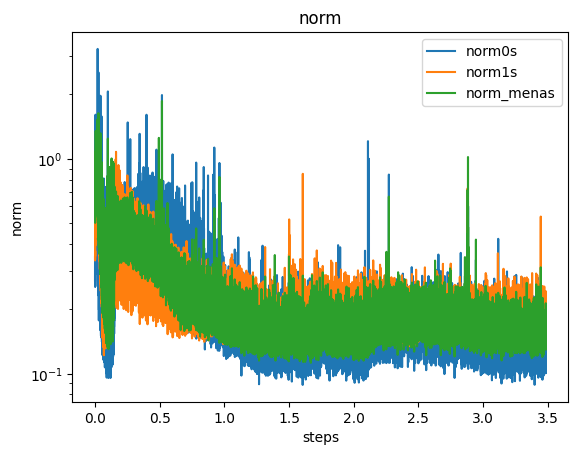

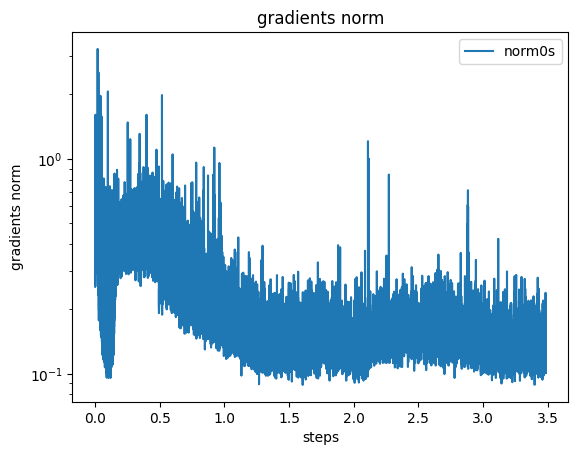

In [42]:
with open("./model/norm_" + data1 + ".csv",encoding='utf-8')as f:
    line_all = f.readlines()

epochs = []
steps = []
norm0s = []
norm1s = []
norm_means = []

for i, line in enumerate( line_all ):
    line_split = line.split( ", " )
    steps.append( float( line_split[1].split(": ")[1] ) )
    epochs.append( float( line_split[1].split(": ")[1] ) / len_tr_loader )
    norm0s.append( float( line_split[2].split(": ")[1] ) )
    norm1s.append( float( line_split[3].split(": ")[1] ) )
    norm_means.append( float( line_split[4].split(": ")[1] ) )

#plt.plot( steps, norm0s, label = 'norm0s')
#plt.plot( steps, norm1s, label = 'norm1s')
#plt.plot( steps, norm_means, label = 'norm_menas')
plt.plot( epochs, norm0s, label = 'norm0s')
plt.plot( epochs, norm1s, label = 'norm1s')
plt.plot( epochs, norm_means, label = 'norm_menas')
plt.title( "norm")
plt.xlabel( 'steps')
plt.ylabel( 'norm')
plt.yscale( 'log' )
plt.legend()
#plt.ylim( 0, 2 )
plt.show()

#plt.plot( steps, norm0s, label = 'norm0s')
plt.plot( epochs, norm0s, label = 'norm0s')
plt.title( "gradients norm")
plt.xlabel( 'steps')
plt.ylabel( 'gradients norm')
plt.yscale( 'log' )
plt.legend()
#plt.ylim( 0, 1.0 )
plt.show()